In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import CSVLogger
from keras.preprocessing import image
import numpy as np
import cv2 as cv

Using TensorFlow backend.


In [2]:
path = r"C:\Users\patrick.j.a.tibayan\Downloads\Capstone\WASTE CLASSIFICATION DATASET"
training_data_dir = path + "\DATASET\TRAIN" 
test_data_dir = path + "\DATASET\TEST" 

IMAGE_SIZE = 200
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)
BATCH_SIZE = 32

In [3]:

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(16))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [4]:

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape, activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))
    
model.compile(loss='binary_crossentropy',
            optimizer=RMSprop(lr=0.0001),
            metrics=['accuracy'])

In [8]:
training_data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)
test_data_generator = ImageDataGenerator(rescale=1./255)

In [9]:
# Data preparation
training_generator = training_data_generator.flow_from_directory(
    training_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary")
test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=1,
    class_mode="binary", 
    shuffle=False)

Found 18682 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [7]:
TRAINING_LOGS_FILE = "training_logs_1.csv"
MODEL_FILE = "model.h1"
EPOCHS=10
model.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[CSVLogger(TRAINING_LOGS_FILE,
                                            append=False,
                                            separator=";")], 
    verbose=1)
model.save_weights(MODEL_FILE)

Epoch 1/10
583/583 [==============================] - 390s 669ms/step - loss: 0.5711 - accuracy: 0.7678
Epoch 2/10
583/583 [==============================] - 394s 676ms/step - loss: 0.4782 - accuracy: 0.8031
Epoch 3/10
583/583 [==============================] - 386s 662ms/step - loss: 0.4606 - accuracy: 0.8118
Epoch 4/10
583/583 [==============================] - 369s 633ms/step - loss: 0.4438 - accuracy: 0.8205
Epoch 5/10
583/583 [==============================] - 372s 638ms/step - loss: 0.4298 - accuracy: 0.8240
Epoch 6/10
583/583 [==============================] - 376s 645ms/step - loss: 0.4348 - accuracy: 0.8275
Epoch 7/10
583/583 [==============================] - 367s 630ms/step - loss: 0.4239 - accuracy: 0.8288
Epoch 8/10
583/583 [==============================] - 366s 628ms/step - loss: 0.4296 - accuracy: 0.8284
Epoch 9/10
583/583 [==============================] - 373s 640ms/step - loss: 0.4374 - accuracy: 0.8276
Epoch 10/10
583/583 [==============================] - 430s 737m

In [40]:
TRAINING_LOGS_FILE = "training_logs.csv"
MODEL_FILE = "model.h5"
model.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[CSVLogger(TRAINING_LOGS_FILE,
                                            append=False,
                                            separator=";")], 
    verbose=1)
model.save_weights(MODEL_FILE)

Epoch 1/10
583/583 [==============================] - 2229s 4s/step - loss: 0.4790 - accuracy: 0.7870
Epoch 2/10
583/583 [==============================] - 2353s 4s/step - loss: 0.4074 - accuracy: 0.8273
Epoch 3/10
583/583 [==============================] - 2248s 4s/step - loss: 0.3795 - accuracy: 0.8460
Epoch 4/10
583/583 [==============================] - 2547s 4s/step - loss: 0.3573 - accuracy: 0.8547
Epoch 5/10
583/583 [==============================] - 2292s 4s/step - loss: 0.3430 - accuracy: 0.8623
Epoch 6/10
583/583 [==============================] - 2247s 4s/step - loss: 0.3229 - accuracy: 0.8711
Epoch 7/10
583/583 [==============================] - 2234s 4s/step - loss: 0.3171 - accuracy: 0.8745
Epoch 8/10
583/583 [==============================] - 2194s 4s/step - loss: 0.3062 - accuracy: 0.8806
Epoch 9/10
583/583 [==============================] - 2046s 4s/step - loss: 0.2944 - accuracy: 0.8871
Epoch 10/10
583/583 [==============================] - 2173s 4s/step - loss: 0.288

In [5]:
model.load_weights('model.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 200, 200, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 100, 100, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 50, 50, 128)      

[ 176 1221  538  503  212  920 1373 1210  536  346 1866 2054 2230 2404
 1667 2498 1568 1932 2395 1891]


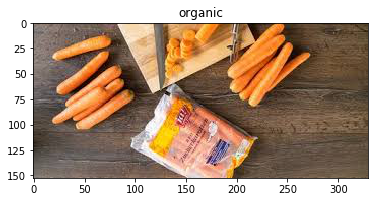

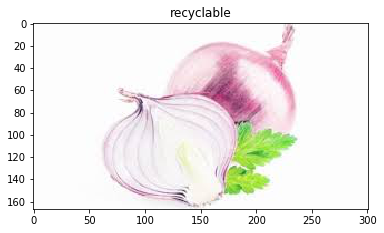

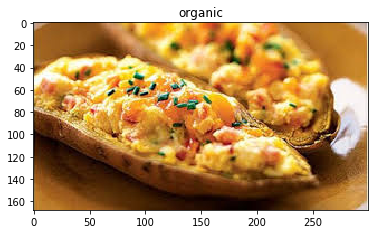

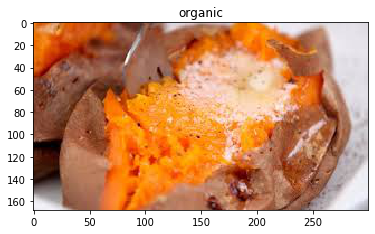

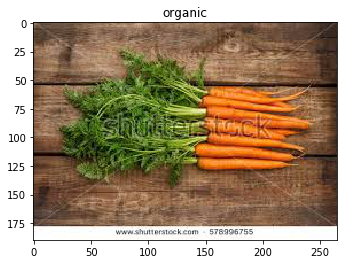

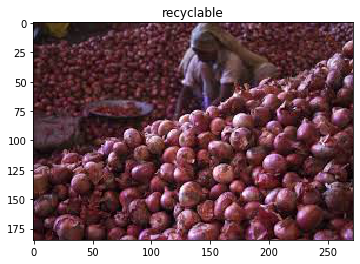

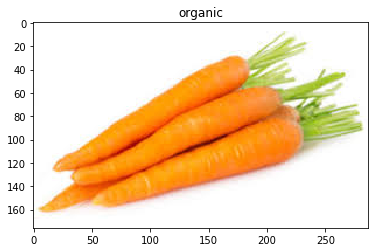

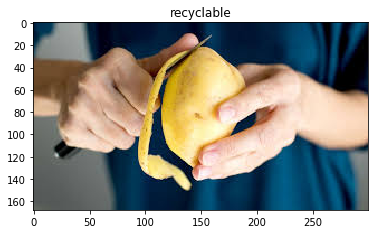

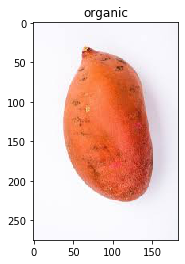

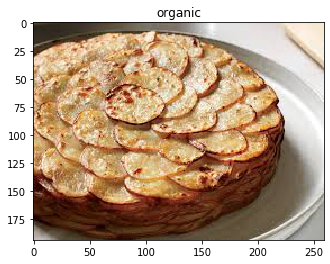

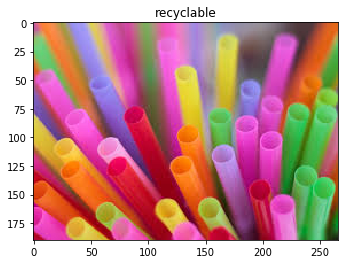

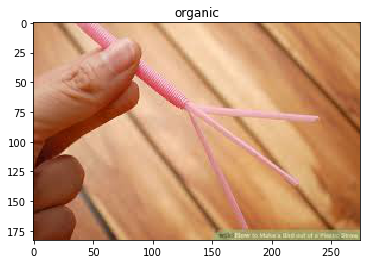

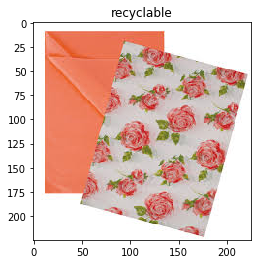

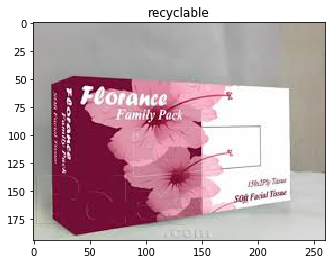

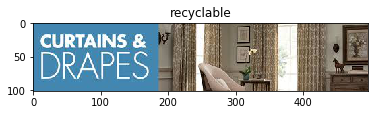

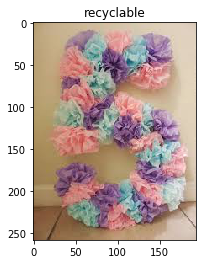

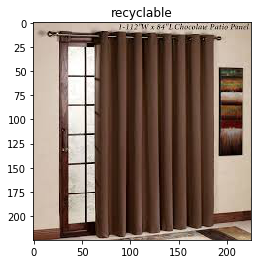

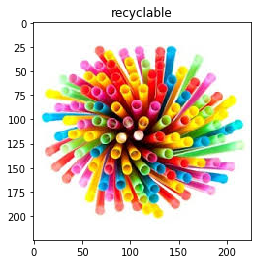

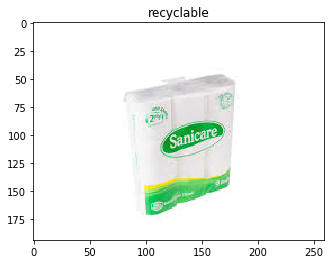

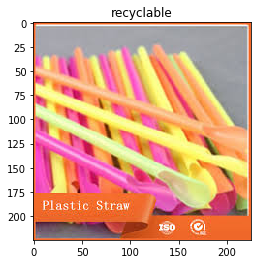

In [10]:
TEST_SIZE=10
# Testing
np.random.seed(7)
arr1 = np.random.randint(low=1,high=1400,size=TEST_SIZE)
arr2 = np.random.randint(low=1500,high=2500,size=TEST_SIZE)
arr3 = np.concatenate((arr1, arr2))
print(arr3)

for index in range(0,len(arr3)):
    image_path = test_data_dir + "/" +test_generator.filenames[arr3[index]]
    img = image.load_img(image_path, target_size=(IMAGE_WIDTH, IMAGE_HEIGHT))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    probability = model.predict(x)
    img = mpimg.imread(image_path)
    plt.imshow(img)
    if probability == 1:
        plt.title("recyclable")
    else:
        plt.title("organic")
    plt.show()

In [8]:
path=r'C:\Users\patrick.j.a.tibayan\Downloads\Capstone\image2.jpeg'
imgSrc = cv.imread(path)
imgRgb = cv.cvtColor(imgSrc,cv.COLOR_BGR2RGB)
imgGray = cv.cvtColor(imgRgb, cv.COLOR_RGB2GRAY)
blur = cv.GaussianBlur(imgGray,(11,11),0)
ret3,th3 = cv.threshold(blur,45,255,cv.THRESH_BINARY)
kernel = np.ones((47,47), np.uint8) 
imgDilate = cv.dilate(th3, kernel, iterations=1) 
imgFinal = cv.GaussianBlur(imgDilate,(55,55),0)
contours, hierarchy = cv.findContours(imgFinal, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
contours = sorted(contours, key = cv.contourArea, reverse = True)

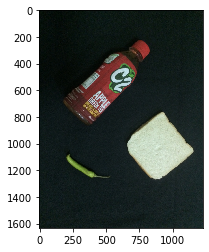

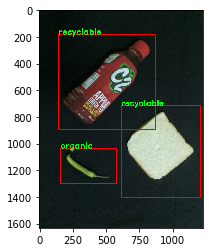

In [36]:
imgCP3=imgRgb.copy()
plt.imshow(imgRgb)
for c in contours:
    area=cv.contourArea(c)
    x,y,w,h = cv.boundingRect(c)
    cv.rectangle(imgCP3,(x,y),(x+w,y+h),(255,0,0),5)
    roi = imgRgb[y:y+h,x:x+w]
    ximg = cv.resize(roi,(IMAGE_WIDTH,IMAGE_HEIGHT))
    ximg = image.img_to_array(ximg)
    ximg = np.expand_dims(ximg, axis=0)
    probability = model.predict(ximg)
    if probability == 1:
        finalOut="recyclable"
    else:
        finalOut="organic"
    cv.putText(imgCP3, text = finalOut, 
    org = (x,y), 
    color = (0, 255, 0),
    fontScale=2,
    fontFace=cv.FONT_HERSHEY_DUPLEX,
    thickness=5)
plt.subplots()
plt.imshow(imgCP3)

In [39]:
path=r'C:\Users\patrick.j.a.tibayan\Downloads\Capstone\image1.jpeg'
imgSrc = cv.imread(path)
imgRgb = cv.cvtColor(imgSrc,cv.COLOR_BGR2RGB)
imgGray = cv.cvtColor(imgRgb, cv.COLOR_RGB2GRAY)
blur = cv.GaussianBlur(imgGray,(11,11),0)
ret3,th3 = cv.threshold(blur,45,255,cv.THRESH_BINARY)
kernel = np.ones((47,47), np.uint8) 
imgDilate = cv.dilate(th3, kernel, iterations=1) 
imgFinal = cv.GaussianBlur(imgDilate,(55,55),0)
contours, hierarchy = cv.findContours(imgFinal, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
contours = sorted(contours, key = cv.contourArea, reverse = True)

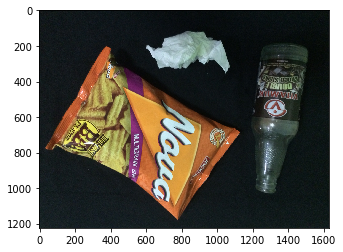

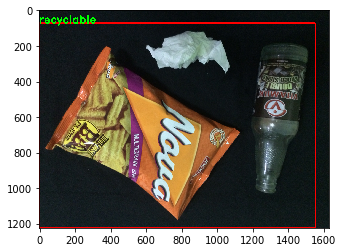

In [40]:
imgCP3=imgRgb.copy()
plt.imshow(imgRgb)
for c in contours:
    area=cv.contourArea(c)
    x,y,w,h = cv.boundingRect(c)
    cv.rectangle(imgCP3,(x,y),(x+w,y+h),(255,0,0),5)
    roi = imgRgb[y:y+h,x:x+w]
    ximg = cv.resize(roi,(IMAGE_WIDTH,IMAGE_HEIGHT))
    ximg = image.img_to_array(ximg)
    ximg = np.expand_dims(ximg, axis=0)
    probability = model.predict(ximg)
    if probability == 1:
        finalOut="recyclable"
    else:
        finalOut="organic"
    cv.putText(imgCP3, text = finalOut, 
    org = (x,y), 
    color = (0, 255, 0),
    fontScale=2,
    fontFace=cv.FONT_HERSHEY_DUPLEX,
    thickness=5)
plt.subplots()
plt.imshow(imgCP3)

['recyclable', 'organic', 'organic']


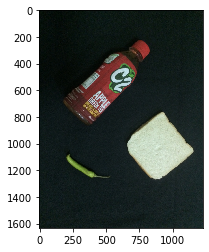

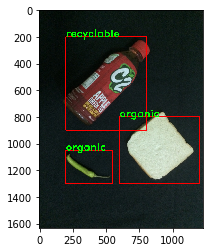

In [40]:
path=r'C:\Users\patrick.j.a.tibayan\Downloads\Capstone\image2.jpeg'
finalOut=[]
pt1s=[(200,200),(600,800),(200,1050)]
pt2s=[(800,900),(1200,1300),(550,1300)]
imgSrc = cv.imread(path)
imgRgb = cv.cvtColor(imgSrc,cv.COLOR_BGR2RGB)
imgCP3=imgRgb.copy()
for i in range(0,len(pt1s)):
    cv.rectangle(imgCP3, pt1 = pt1s[i], pt2 = pt2s[i], 
                  color = (255, 0, 0), thickness = 5)
plt.imshow(imgRgb)
roi1 = imgRgb[200:900, 200:800]
roi2 = imgRgb[800:1300,600:1200]
roi3 = imgRgb[1050:1300,200:550]
for i in range(1,4):
    imageName="roi"+str(i)
    x = cv.resize(eval(imageName),(IMAGE_WIDTH,IMAGE_HEIGHT))
    x = image.img_to_array(x)
    x = np.expand_dims(x, axis=0)
    probability = model.predict(x)
    if probability == 1:
        finalOut.append("recyclable")
    else:
        finalOut.append("organic")
print(finalOut)
for i in range(0,len(pt1s)):
    cv.putText(imgCP3, text = finalOut[i], 
    org = pt1s[i], 
    color = (0, 255, 0),
    fontFace=cv.FONT_HERSHEY_DUPLEX, fontScale=2.5,thickness=5)
plt.subplots()
plt.imshow(imgCP3)


['recyclable', 'recyclable', 'recyclable']


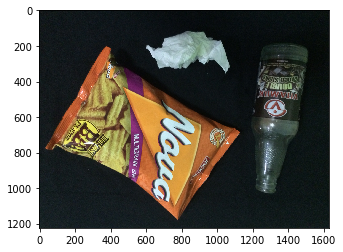

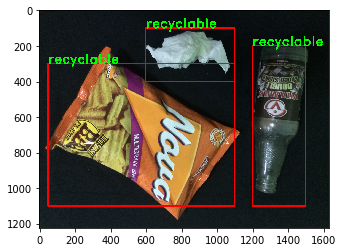

In [41]:
path2=r'C:\Users\patrick.j.a.tibayan\Downloads\Capstone\image1.jpeg'
finalOut=[]
pts1=[(600,100),(1200,200),(50,300)]
pts2=[(1100,400),(1500,1100),(1100,1100)]
imgSrc1 = cv.imread(path2)
imgRgb1 = cv.cvtColor(imgSrc1,cv.COLOR_BGR2RGB)
imgCP4=imgRgb1.copy()
for i in range(0,len(pt1s)):
    cv.rectangle(imgCP4, pt1 = pts1[i], pt2 = pts2[i], 
                  color = (255, 0, 0), thickness = 5)
plt.imshow(imgRgb1)
plt.subplots()

roi4 = imgRgb1[100:400, 600:1100]
roi5 = imgRgb1[200:1100,1200:1500]
roi6 = imgRgb1[300:1100,50:1100]
for i in range(4,7):
    imageName="roi"+str(i)
    x = cv.resize(eval(imageName),(IMAGE_WIDTH,IMAGE_HEIGHT))
    x = image.img_to_array(x)
    x = np.expand_dims(x, axis=0)
    probability = model.predict(x)
    if probability == 1:
        finalOut.append("recyclable")
    else:
        finalOut.append("organic")
print(finalOut)
for i in range(0,len(pts1)):
    cv.putText(imgCP4, text = finalOut[i], 
    org = pts1[i], 
    color = (0, 255, 0),
    fontFace=cv.FONT_HERSHEY_DUPLEX, fontScale=2.5,thickness=5)
plt.imshow(imgCP4)

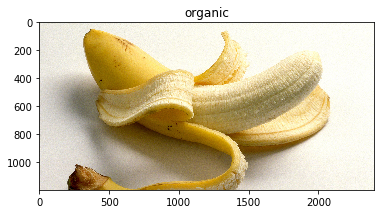

In [42]:
path = r"C:\Users\patrick.j.a.tibayan\Downloads\Capstone\banana.jpg"
donImg = cv.imread(path)
donImg = cv.cvtColor(donImg,cv.COLOR_BGR2RGB)
x = cv.resize(donImg,(IMAGE_WIDTH,IMAGE_HEIGHT))
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
probability = model.predict(x)
plt.imshow(donImg)
if probability == 1:
    plt.title("recyclable")
else:
    plt.title("organic")
plt.show()